# MoSDeF: A Molecular Simulation and Design Framework

The Molecular Simulation and Design Framework (MoSDeF) is a collection of open-source tools ([hosted on Github](https://github.com/mosdef-hub)) aimed at facilitating the construction and simulation of complex molecular systems - with a particular focus on the automated screening of large structural parameter spaces. All tools are written as Python packages and feature a Python-based API.

## Basic Foyer tutorial

The second of the MoSDeF tools we will explore is the [Foyer package](https://github.com/mosdef-hub/foyer) which provides a means for the automated application and dissemination of forcefields. This tool can be used to take a molecular model featuring particle positions and bonds (such as an mBuild `Compound`) and automatically perform atomtyping (as well as parameterization) as directed by a user-specified forcefield. In this tutorial, we'll demonstrate how Foyer works by using it to perform atomtyping and parameterization of several alkane molecules.

### Foyer XML format

Foyer forcefields are defined within an XML file that contains both the 'rules' required for atomtyping as well as the forcefield parameters within a single file. The Foyer XML format is an extension of the [OpenMM forcefield XML format](http://docs.openmm.org/7.0.0/userguide/application.html#creating-force-fields), which you may already be familiar with. The only differences reside in the `AtomTypes` section, where several additional attributes are available (which we will examine in a moment) for each `Type` to allow for atomtyping.

Let's take a look at the basic structure of a Foyer XML file.

#### AtomTypes

In [3]:
! sed -n 2,18p forcefield.xml

    <AtomTypes>
        <Type name="opls_135" def="O"
              class="CT" element="C" mass="12.01100" desc="alkane CH3, C"
              doi="10.1021/ja9621760"/>

        <Type name="opls_136" def="O"
              class="CT" element="C" mass="12.01100" desc="alkane CH2, C"
              doi="10.1021/ja9621760"/>

        <Type name="opls_138" def="O"
              class="CT" element="C" mass="12.01100" desc="alkane CH4, C"
              doi="10.1021/ja9621760"/>

        <Type name="opls_140" def="O"
              class="HC" element="H" mass="1.00800" desc="alkane H"
              doi="10.1021/ja9621760"/>
    </AtomTypes>


Here, our forcefield contains four atomtypes (corresponding to the OPLS atomtypes for an alkane hydrogen and alkane carbons in CH2, CH3, and CH4 groups).

The `AtomTypes` section of the Foyer XML is similar to that used for OpenMM forcefield XMLs; however, each `Type` in a Foyer XML supports four additional attributes not found in OpenMM:
* `def` - SMARTS string describing the chemical substructure of this atomtype
* `desc` - Brief description of the atomtype
* `doi` - DOI reference for parameters associated with this atomtype
* `overrides` - One or more atomtypes to 'override', providing precedence to this atomtype

Atomtypes are defined using [SMARTS](http://www.daylight.com/dayhtml/doc/theory/theory.smarts.html), which provide a language for describing chemical structures and substructures. In the above output you'll notice the SMARTS provided for each atomtype are `"O"`. This is clearly incorrect, as none of these atomtypes represent oxygens, so we will work on adding the correct SMARTS in a moment.

#### Forcefield parameters

The remaining sections of the Foyer XML are currently the same as defined in the OpenMM format and feature both the bonded and nonbonded forcefield parameters.

In [4]:
! sed -n 19,41p forcefield.xml

    <HarmonicBondForce>
        <Bond class1="CT" class2="CT" length="0.1529" k="224262.4"/>
        <Bond class1="CT" class2="HC" length="0.1090" k="284512.0"/>
    </HarmonicBondForce>
    <HarmonicAngleForce>
        <Angle class1="CT" class2="CT" class3="CT" angle="1.966986067" k="488.273"/>
        <Angle class1="CT" class2="CT" class3="HC" angle="1.932079482" k="313.800"/>
        <Angle class1="HC" class2="CT" class3="HC" angle="1.881464934" k="276.144"/>
    </HarmonicAngleForce>
    <RBTorsionForce>
        <Proper class1="CT" class2="CT" class3="CT" class4="CT" c0="2.9288"
                c1="-1.4644" c2="0.2092" c3="-1.6736" c4="0.0" c5="0.0"/>
        <Proper class1="CT" class2="CT" class3="CT" class4="HC" c0="0.6276"
                c1="1.8828" c2="0.0" c3="-2.5104" c4="0.0" c5="0.0"/>
        <Proper class1="HC" class2="CT" class3="CT" class4="HC" c0="0.6276"
                c1="1.8828" c2="0.0" c3="-2.5104" c4="0.0" c5="0.0"/>
    </RBTorsionForce>
    <NonbondedForce co

### Constructing a Foyer XML

Now we'll work to construct a valid Foyer forcefield XML that can correctly parameterize linear alkanes according to the OPLS forcefield. Our forcefield is already mostly complete (all parameters and atomtypes are included); however, you'll notice that the `def` attribute of each atomtype features a `"O"` string rather than the correct SMARTS. We will have to correctly define the SMARTS for these atomtypes for Foyer to be able to successfully parameterize our molecules.

To test our forcefield, we script is included, `test_atomtyping.py`, which will use our Foyer XML to attempt to atomtype three alkane molecules (methane, ethane, and propane) and will compare the resulting atomtypes assigned by Foyer to the known atomtypes that should be assigned.

Let's go ahead and run `test_atomtyping.py` to see what happens.

/Users/summeraz/anaconda/envs/py3/lib/python3.5/site-packages/pandas/io/parsers.py:2108: FutureWarning: split() requires a non-empty pattern match.
  yield pat.split(line.strip())
/Users/summeraz/anaconda/envs/py3/lib/python3.5/site-packages/pandas/io/parsers.py:2110: FutureWarning: split() requires a non-empty pattern match.
  yield pat.split(line.strip())


<IPython.core.display.Javascript object>


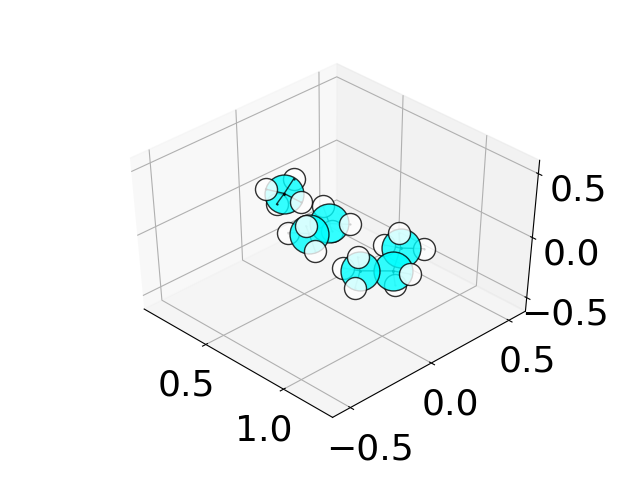

In [6]:
%matplotlib notebook
import mbuild as mb
from visualize import visualize
methane = mb.load('test_molecules/methane.mol2')
ethane = mb.load('test_molecules/ethane.mol2')
propane = mb.load('test_molecules/propane.mol2')
ethane.translate_to([0.6, 0, 0])
propane.translate_to([1, 0, 0])
alkanes = mb.Compound(subcompounds=(methane, ethane, propane))
visualize(alkanes)

In [5]:
! py.test -v test_atomtyping.py

============================= test session starts ==============================
platform darwin -- Python 3.5.2, pytest-3.1.1, py-1.4.32, pluggy-0.4.0 -- /Users/summeraz/anaconda/envs/py3/bin/python
cachedir: .cache
rootdir: /Users/summeraz/mosdef_workshop/foyer-examples, inifile:
collected 3 items 

test_atomtyping.py::test_atomtyping[test_molecules/ethane.mol2] FAILED
test_atomtyping.py::test_atomtyping[test_molecules/methane.mol2] FAILED
test_atomtyping.py::test_atomtyping[test_molecules/propane.mol2] FAILED

=================================== FAILURES ===================================
_________________ test_atomtyping[test_molecules/ethane.mol2] __________________

mol2_file = 'test_molecules/ethane.mol2'

    @pytest.mark.parametrize('mol2_file', MOL2_FILES)
    def test_atomtyping(mol2_file):
        structure = pmd.load_file(mol2_file, structure=True)
>       atomtype(structure, FORCEFIELD)

test_atomtyping.py:17: 
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 

Unsurprisingly, all three of our tests failed as Foyer was unable to identify any valid atomtypes for the atoms in each of our molecules. Let's see what happens if we change the SMARTS strings for `opls_138` (carbon, CH4) and `opls_140` (alkane H).

In [6]:
! sed -n 2,18p forcefield.xml

    <AtomTypes>
        <Type name="opls_135" def="O"
              class="CT" element="C" mass="12.01100" desc="alkane CH3, C"
              doi="10.1021/ja9621760"/>

        <Type name="opls_136" def="O"
              class="CT" element="C" mass="12.01100" desc="alkane CH2, C"
              doi="10.1021/ja9621760"/>

        <Type name="opls_138" def="[C;X4]"
              class="CT" element="C" mass="12.01100" desc="alkane CH4, C"
              doi="10.1021/ja9621760"/>

        <Type name="opls_140" def="H[C;X4]"
              class="HC" element="H" mass="1.00800" desc="alkane H"
              doi="10.1021/ja9621760"/>
    </AtomTypes>


In [16]:
! py.test -v test_atomtyping.py

============================= test session starts ==============================
platform darwin -- Python 3.5.2, pytest-3.1.1, py-1.4.32, pluggy-0.4.0 -- /Users/summeraz/anaconda/envs/py3/bin/python
cachedir: .cache
rootdir: /Users/summeraz/mosdef_workshop/foyer-examples, inifile:
collected 3 items 

test_atomtyping.py::test_atomtyping[test_molecules/ethane.mol2] PASSED
test_atomtyping.py::test_atomtyping[test_molecules/methane.mol2] PASSED
test_atomtyping.py::test_atomtyping[test_molecules/propane.mol2] PASSED

=========================== 3 passed in 1.57 seconds ===========================


In [13]:
! python test_atomtyping.py

Traceback (most recent call last):
  File "test_atomtyping.py", line 20, in <module>
    structure = pmd.load_file(mol2_file, structure=True)
NameError: name 'mol2_file' is not defined


We now only have two failed tests, as the methyl compound has been atomtyped correctly. To get the ethane and propane tests to pass, we will need to fill in the SMARTS strings for `opls_135` and `opls_136`. See if you can come up with the correct SMARTS strings and test them out by re-executing the `py.test test_atomtyping.py` code block above.

### Foyer + mBuild

Foyer has been designed to integrate seamlessly with mBuild, although it can also be used as a standalone package. To call Foyer from mBuild all a user needs to do is specify the forcefield XML file to use by passing `forcefield_files` flag to `Compound.save()`. Internally this will perform parameterization of the mBuild `Compound` using Foyer.

Additionally, the `references_file` flag can be used to output a file (in BibTeX format) containing the references for the parameters used for parameterization of this `Compound`.

Here, we explore this functionality by loading a simple methane molecule into an mBuild `Compound` and save using the forcefield we've just defined.

In [17]:
import mbuild as mb

ch4 = mb.load('ch4.pdb')
ch4.save('ch4.top', forcefield_files='forcefield_master.xml', references_file='ch4.bib', overwrite=True)

In [5]:
! cat ch4.top

;
;   File ch4.top  was generated
;   By user: summeraz (501)
;   On host: Andrews-MacBook-Pro.local
;   At date: Wed. October  3 16:40:38 2017
;
;   This is a standalone topology file
;
;   Created by:
;   ParmEd:       ipykernel_launcher.py, VERSION 2.7.3
;   Executable:   ipykernel_launcher.py
;   Library dir:  /usr/local/gromacs/share/gromacs/top
;   Command line:
;     /Users/summeraz/anaconda/envs/py3/lib/python3.5/site-packages/ipykernel_launcher.py -f /Users/summeraz/Library/Jupyter/runtime/kernel-e15fdb7a-5736-4323-9bfe-14a85e0a9386.json
;

[ defaults ]
; nbfunc        comb-rule       gen-pairs       fudgeLJ fudgeQQ
1               2               yes             1             1

[ atomtypes ]
; name    at.num    mass    charge ptype  sigma      epsilon
opls_138        6   12.01078    0.000000  A          0.35      0.276144
opls_140        1    1.00795    0.000000  A          0.25       0.12552


[ moleculetype ]
; Name            nrexcl
RES          3

[ atoms ]
;   nr       

In [6]:
! cat ch4.bib

@article{Jorgensen_1996,
	doi = {10.1021/ja9621760},
	url = {https://doi.org/10.1021%2Fja9621760},
	year = 1996,
	month = {jan},
	publisher = {American Chemical Society ({ACS})},
	volume = {118},
	number = {45},
	pages = {11225--11236},
	author = {William L. Jorgensen and David S. Maxwell and Julian Tirado-Rives},
	title = {Development and Testing of the {OPLS} All-Atom Force Field on Conformational Energetics and Properties of Organic Liquids},
	journal = {Journal of the American Chemical Society},
	note = {Parameters for atom types: opls_140, opls_138}
}


## Quick-start

If you are interested in defining your existing forcefield(s) in the Foyer XML format, we currently have a forcefield template hosted on Github to help you get started - https://github.com/mosdef-hub/forcefield_template. We also refer interested users to the [OpenMM documentation](http://docs.openmm.org/7.0.0/userguide/application.html#creating-force-fields) for detailed instructions on forcefield creation.